In [355]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree

In [356]:
df = pd.read_csv("maternal_risk.csv")

In [357]:
# Get the shape of the DataFrame
print("Data shape:", df.shape)

Data shape: (808, 7)


In [358]:
# data information  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          808 non-null    int64  
 1   SystolicBP   808 non-null    int64  
 2   DiastolicBP  808 non-null    int64  
 3   BS           808 non-null    float64
 4   BodyTemp     808 non-null    float64
 5   HeartRate    808 non-null    int64  
 6   RiskLevel    808 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 44.3+ KB


In [359]:
print(df.describe())

              Age  SystolicBP  DiastolicBP          BS    BodyTemp   HeartRate
count  808.000000  808.000000   808.000000  808.000000  808.000000  808.000000
mean    30.585396  112.972772    77.500000    9.264839   98.640347   74.297030
std     13.922075   19.924312    14.772207    3.617635    1.386501    8.822686
min     10.000000   70.000000    49.000000    6.000000   98.000000    7.000000
25%     19.000000   90.000000    65.000000    7.000000   98.000000   70.000000
50%     27.000000  120.000000    80.000000    7.500000   98.000000   76.000000
75%     40.000000  120.000000    90.000000   11.000000   98.000000   80.000000
max     70.000000  160.000000   100.000000   19.000000  103.000000   90.000000


In [360]:
# Get first few rows
print(df.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [361]:
# Check for missing values
print("Missing values:")
df.isnull().sum()

Missing values:


Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [362]:
# Convert categorical variable
# 1: high risk
# 0: low risk
df['RiskLevel'] = df['RiskLevel'].apply(lambda x: 1 if x == 'high risk' else 0)

In [363]:
print(df.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86          1
1   35         140           90  13.0      98.0         70          1
2   29          90           70   8.0     100.0         80          1
3   30         140           85   7.0      98.0         70          1
4   35         120           60   6.1      98.0         76          0


In [364]:
def remove_outliers(column):
    # Assuming df is your DataFrame and 'column' is the column containing the values you want to check for outliers
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove rows with values outside the bounds
    column = column.where(column >= lower_bound,lower_bound)
    column = column.where(column <= upper_bound,upper_bound)
    return column

In [365]:
df = df.apply(remove_outliers, axis=0)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,1
1,35,140,90,13.0,98.0,70,1
2,29,90,70,8.0,98.0,80,1
3,30,140,85,7.0,98.0,70,1
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
803,24,120,80,7.5,98.0,66,0
804,16,100,70,7.5,98.0,80,0
805,19,120,76,7.5,98.0,66,0
806,40,160,100,17.0,98.0,77,1


In [366]:
print(f'Low Risk Count: {df['RiskLevel'].value_counts()[0]}')
print(f'High Risk Count: {df['RiskLevel'].value_counts()[1]}')

Low Risk Count: 478
High Risk Count: 330


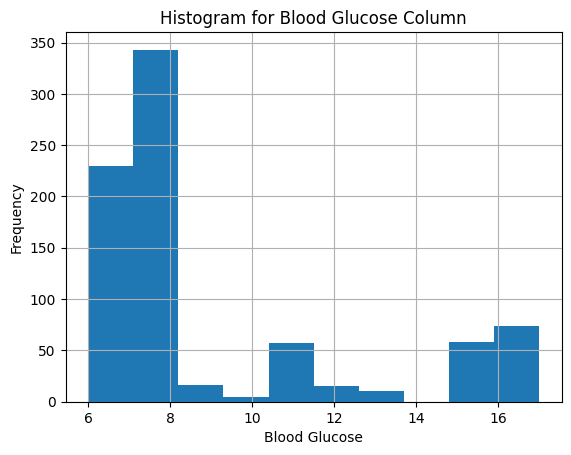

In [367]:
# Plotting Histogram for the 'BS' column 
hist = df['BS'].hist(bins=10) 
  
# Adding title and labels 
plt.title('Histogram for Blood Glucose Column') 
plt.xlabel('Blood Glucose') 
plt.ylabel('Frequency') 
  
# Display the histogram 
plt.show() 

<Axes: xlabel='BS', ylabel='RiskLevel'>

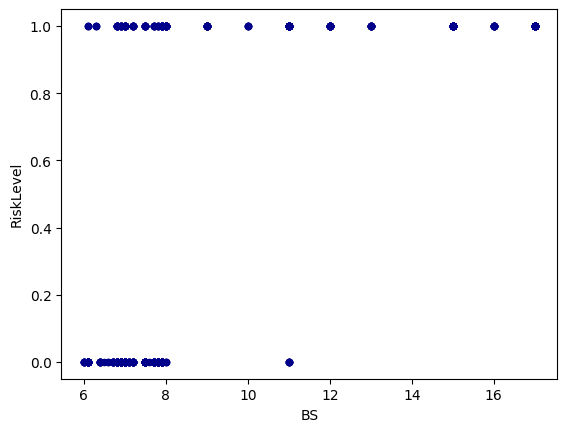

In [368]:
df.plot.scatter(x='BS', y='RiskLevel', c='DarkBlue')

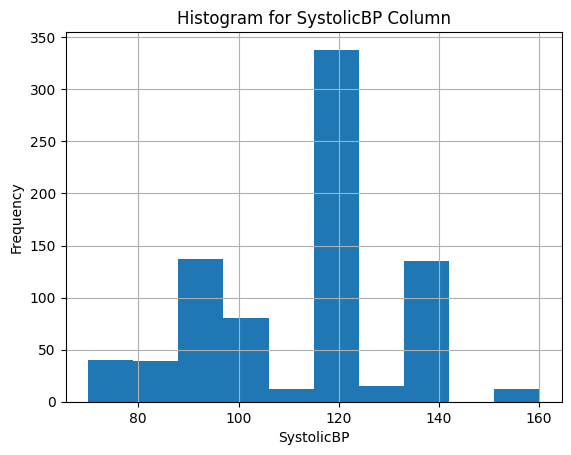

In [369]:
# Plotting Histogram for the 'Length' column 
hist = df['SystolicBP'].hist(bins=10) 
  
# Adding title and labels 
plt.title('Histogram for SystolicBP Column') 
plt.xlabel('SystolicBP') 
plt.ylabel('Frequency') 
  
# Display the histogram 
plt.show() 

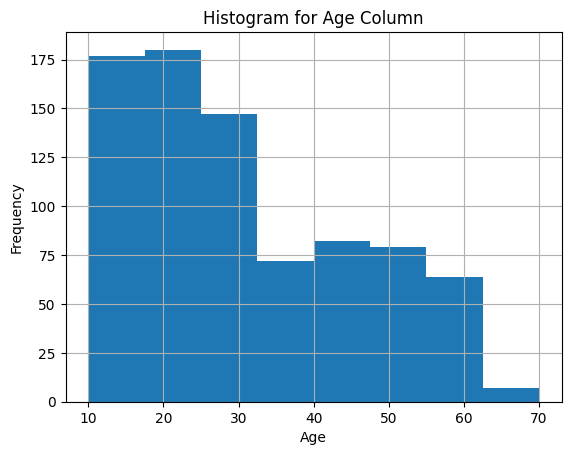

In [370]:
# Plotting Histogram for the 'Length' column 
hist = df['Age'].hist(bins=8) 
  
# Adding title and labels 
plt.title('Histogram for Age Column') 
plt.xlabel('Age') 
plt.ylabel('Frequency') 
  
# Display the histogram 
plt.show() 

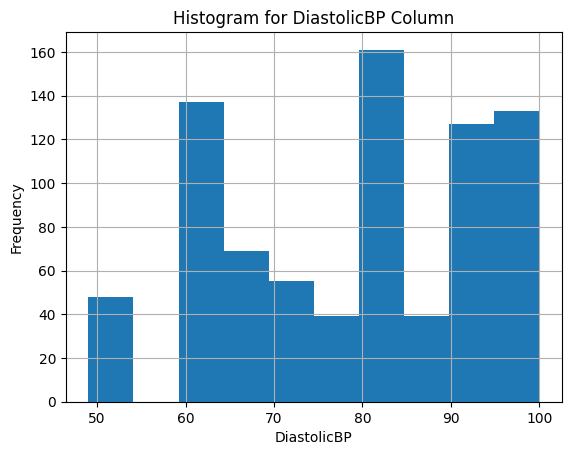

In [371]:
# Plotting Histogram for the 'Length' column 
hist = df['DiastolicBP'].hist(bins=10) 
  
# Adding title and labels 
plt.title('Histogram for DiastolicBP Column') 
plt.xlabel('DiastolicBP') 
plt.ylabel('Frequency') 
  
# Display the histogram 
plt.show() 

<Axes: >

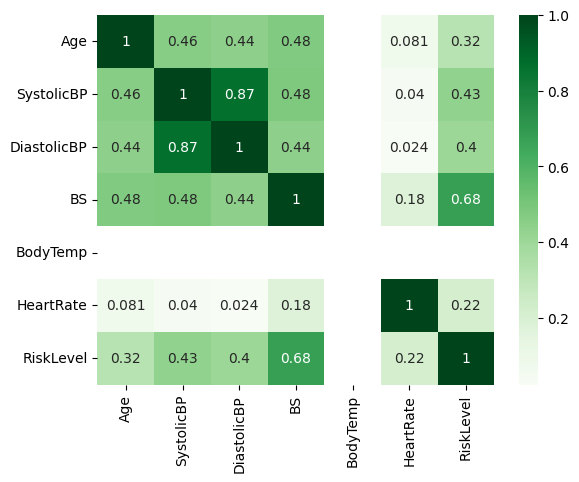

In [372]:
#plotting correlation matrix 
sns.heatmap(df.corr(), cmap="Greens", annot=True)

In [373]:
# Drop unnamed column
df = df.drop(columns=['DiastolicBP'])

In [374]:
df.head()

,Age,SystolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,15.0,98.0,86,1
1,35,140,13.0,98.0,70,1
2,29,90,8.0,98.0,80,1
3,30,140,7.0,98.0,70,1
4,35,120,6.1,98.0,76,0


In [375]:
# Build distinct data frames on diagnosis column
X = df.drop('RiskLevel', axis=1) # all except 'RiskLevel'
y = df['RiskLevel']

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Test the model
y_train_pred = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the testing set
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compare the accuracy on the training set and the testing set
print("Accuracy on the training set:", train_accuracy)
print("Accuracy on the testing set:", test_accuracy)

Accuracy on the training set: 0.9876106194690265
Accuracy on the testing set: 0.9465020576131687


[Text(0.6820652173913043, 0.9666666666666667, 'x[2] <= 7.95\ngini = 0.48\nsamples = 565\nvalue = [339, 226]'),
 Text(0.47282608695652173, 0.9, 'x[1] <= 132.0\ngini = 0.259\nsamples = 392\nvalue = [332, 60]'),
 Text(0.45108695652173914, 0.8333333333333334, 'x[0] <= 14.5\ngini = 0.152\nsamples = 362\nvalue = [332, 30]'),
 Text(0.2717391304347826, 0.7666666666666667, 'x[2] <= 7.65\ngini = 0.457\nsamples = 17\nvalue = [11, 6]'),
 Text(0.25, 0.7, 'x[0] <= 12.5\ngini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(0.22826086956521738, 0.6333333333333333, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.2717391304347826, 0.6333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.29347826086956524, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6304347826086957, 0.7666666666666667, 'x[4] <= 84.0\ngini = 0.129\nsamples = 345\nvalue = [321, 24]'),
 Text(0.45652173913043476, 0.7, 'x[2] <= 7.6\ngini = 0.106\nsamples = 322\nvalue = [304, 18]'),
 Text(0.31521739130434784,

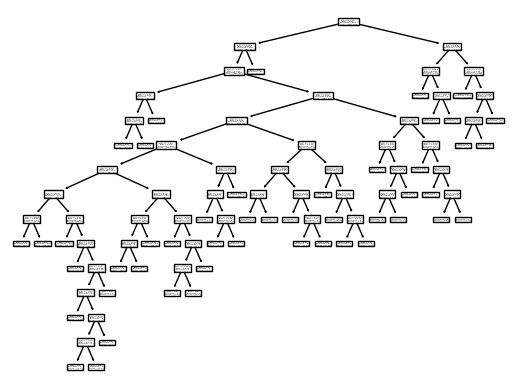

In [377]:
tree.plot_tree(dt)

In [378]:
# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Test the model
y_train_pred = logreg.predict(X_train)
log_train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the testing set
y_test_pred = logreg.predict(X_test)
log_test_accuracy = accuracy_score(y_test, y_test_pred)

# Compare the accuracy on the training set and the testing set
print("Accuracy on the training set:", log_train_accuracy)
print("Accuracy on the testing set:", log_test_accuracy)

Accuracy on the training set: 0.8814159292035398
Accuracy on the testing set: 0.8888888888888888


In [379]:
# Define a new passenger
patient = pd.DataFrame({
    'Age': [28],
    'SystolicBP': [120],
    'BS': [6],
    'BodyTemp': [98],
    'HeartRate': [75]
})

display(patient)

,Age,SystolicBP,BS,BodyTemp,HeartRate
0,28,120,6,98,75


In [380]:
# Predict the survival probability for the new patient
low_risk_proba, high_risk_proba = np.squeeze(logreg.predict_proba(patient))

# Print the high risk probability
print('High risk probability: {:.2%}'.format(high_risk_proba))  
print('Low risk probability: {:.2%}'.format(low_risk_proba))

High risk probability: 7.50%
Low risk probability: 92.50%


In [381]:
# Define a new patient
patient_high_systolic = pd.DataFrame({
    'Age': [28],
    'SystolicBP': [140],
    'BS': [6],
    'BodyTemp': [98],
    'HeartRate': [75]
})

display(patient_high_systolic)

,Age,SystolicBP,BS,BodyTemp,HeartRate
0,28,140,6,98,75


In [382]:
# Predict the high/low risk probability for the new patient
low_risk_proba, high_risk_proba = np.squeeze(logreg.predict_proba(patient))

# Print the high risk probability
print('High risk probability: {:.2%}'.format(high_risk_proba))  
print('Low risk probability: {:.2%}'.format(low_risk_proba))

High risk probability: 7.50%
Low risk probability: 92.50%


In [384]:
# Decision tree model is used to determine the importance of each feature
importances = dt.feature_importances_
for feature, importance in zip(patient.columns, importances):
    print(f'The importance of {feature} is: {importance}')

The importance of Age is: 0.12203530116944142
The importance of SystolicBP is: 0.215499018023127
The importance of BS is: 0.6330914156119845
The importance of BodyTemp is: 0.0
The importance of HeartRate is: 0.029374265195447197
